# 📘 European Option Valuation using the Black-Scholes Model

This notebook implements the Black-Scholes model for **European call and put options**. It includes:
- 📚 Theoretical background
- 🧮 Mathematical formulas
- 💻 Python implementation with user input
- 📊 Visualization of option prices

---

## 📚 Theoretical Foundation

The Black-Scholes model is based on the following assumptions:

- The price of the underlying asset follows a geometric Brownian motion:  
  $$ dS_t = \mu S_t dt + \sigma S_t dW_t $$
- Markets are frictionless and arbitrage-free.
- The risk-free interest rate \( r \) is constant.
- Volatility \( \sigma \) is constant.
- No dividends are paid.

Under these assumptions, the price of a European call option is given by:

$$
C = S \cdot N(d_1) - K e^{-rT} \cdot N(d_2)
$$

and for a put option:

$$
P = K e^{-rT} \cdot N(-d_2) - S \cdot N(-d_1)
$$

where:

$$
d_1 = \frac{\ln(S/K) + (r + \frac{\sigma^2}{2}) T}{\sigma \sqrt{T}}, \quad
d_2 = d_1 - \sigma \sqrt{T}
$$

In [4]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [5]:
#  Black-Scholes Pricing Function
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Computes the price of a European call or put option using the Black-Scholes formula.

    Parameters:
    S : float         -> Current stock price
    K : float         -> Strike price
    T : float         -> Time to maturity (in years)
    r : float         -> Risk-free interest rate
    sigma : float     -> Volatility of the underlying
    option_type : str -> 'call' or 'put'

    Returns:
    float: Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")


#### 🧮 User Input

In [6]:
#  User Input
try:
    S = float(input("Enter the current stock price (S): "))
    K = float(input("Enter the strike price (K): "))
    T = float(input("Enter the time to maturity in years (T): "))
    r = float(input("Enter the risk-free interest rate (r): "))
    sigma = float(input("Enter the volatility (sigma): "))
    option_type = input("Enter the option type ('call' or 'put'): ").lower().strip()

    # Calculate and display the option price
    option_price = black_scholes(S, K, T, r, sigma, option_type)
    print(f"\nThe {option_type.upper()} option price is: {option_price:.2f}")

except Exception as e:
    print(f"Error: {e}")


Error: could not convert string to float: ''


In [ ]:
"""
  Example with TEMPUS AI data at 07/07/2025
"""

options_data = [
    {'option_type': 'call', 'K': 30, 'market_price': 29.80, 'imp_vol': 0.023, 'T': 0.27},
    {'option_type': 'call', 'K': 35, 'market_price': 24.80, 'imp_vol': 0.018, 'T': 0.27},
    {'option_type': 'call', 'K': 40, 'market_price': 20.10, 'imp_vol': 0.017, 'T': 0.27},
    {'option_type': 'put',  'K': 30, 'market_price': 0.03,  'imp_vol': 0.019, 'T': 0.27},
    {'option_type': 'put',  'K': 40, 'market_price': 0.05,  'imp_vol': 0.012, 'T': 0.27},
]
S = 58.25
r = 0.05

for option in options_data:
    K = option['K']
    T = option['T']
    sigma = option['imp_vol']
    market_price = option['market_price']
    option_type = option['option_type']
    
    model_price = black_scholes(S, K, T, r, sigma, option_type)
    
    print(f"{option_type.upper()} option with K={K}: Market = {market_price:.2f} | Model = {model_price:.2f}")

CALL option with K=30: Market = 29.80 | Model = 28.65
CALL option with K=35: Market = 24.80 | Model = 23.72
CALL option with K=40: Market = 20.10 | Model = 18.79
PUT option with K=30: Market = 0.03 | Model = 0.00
PUT option with K=40: Market = 0.05 | Model = 0.00


#### 📊 Visualization: Option Price vs. Underlying Price (S)

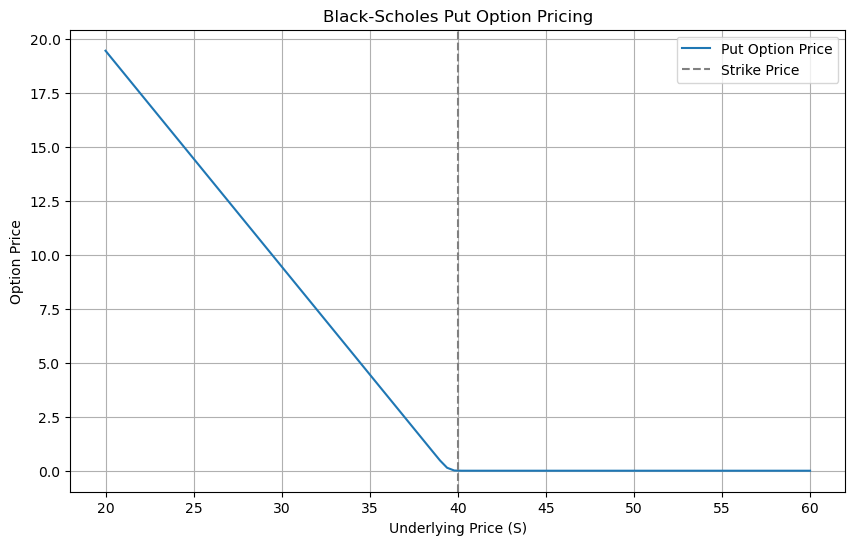

In [8]:
S_range = np.linspace(0.5 * K, 1.5 * K, 100)
option_prices = [black_scholes(s, K, T, r, sigma, option_type) for s in S_range]

plt.figure(figsize=(10, 6))
plt.plot(S_range, option_prices, label=f"{option_type.capitalize()} Option Price")
plt.axvline(K, color='gray', linestyle='--', label='Strike Price')
plt.title(f"Black-Scholes {option_type.capitalize()} Option Pricing")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()